### RSM8413 - Group Assignment 3 - Python Source Code

In [ ]:
#pip install eli5

In [ ]:
import eli5

In [ ]:
#pip install keras

In [ ]:
#pip install tensorflow

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense

In [106]:
seed = 123
np.random.seed(seed)

In [183]:
# load dataset
dataset = pd.read_csv("USCensusTraining.csv")

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
age               25000 non-null int64
workclass         25000 non-null object
demogweight       25000 non-null int64
education         25000 non-null object
education-num     25000 non-null int64
marital-status    25000 non-null object
occupation        25000 non-null object
relationship      25000 non-null object
race              25000 non-null object
sex               25000 non-null object
capital-gain      25000 non-null int64
capital-loss      25000 non-null int64
hours-per-week    25000 non-null int64
native-country    25000 non-null object
income            25000 non-null object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [109]:
dataset['workclass'].value_counts()

Private             17385
Self-emp-not-inc     1978
Local-gov            1624
?                    1399
State-gov             993
Self-emp-inc          857
Federal-gov           750
Without-pay             9
Never-worked            5
Name: workclass, dtype: int64

In [110]:
dataset['education'].value_counts()

HS-grad         8120
Some-college    5597
Bachelors       4140
Masters         1300
Assoc-voc       1059
11th             909
Assoc-acdm       801
10th             721
7th-8th          491
Prof-school      430
9th              394
12th             323
Doctorate        315
5th-6th          244
1st-4th          120
Preschool         36
Name: education, dtype: int64

In [111]:
dataset['marital-status'].value_counts()

Married-civ-spouse       11441
Never-married             8225
Divorced                  3435
Separated                  786
Widowed                    769
Married-spouse-absent      328
Married-AF-spouse           16
Name: marital-status, dtype: int64

In [112]:
dataset['occupation'].value_counts()

Prof-specialty       3180
Craft-repair         3122
Exec-managerial      3084
Adm-clerical         2975
Sales                2815
Other-service        2555
Machine-op-inspct    1536
?                    1404
Transport-moving     1228
Handlers-cleaners    1000
Farming-fishing       767
Tech-support          703
Protective-serv       503
Priv-house-serv       121
Armed-Forces            7
Name: occupation, dtype: int64

In [113]:
dataset['relationship'].value_counts()

Husband           10064
Not-in-family      6443
Own-child          3911
Unmarried          2640
Wife               1213
Other-relative      729
Name: relationship, dtype: int64

In [114]:
dataset['race'].value_counts()

White                 21391
Black                  2379
Asian-Pac-Islander      775
Amer-Indian-Eskimo      241
Other                   214
Name: race, dtype: int64

In [115]:
dataset['sex'].value_counts()

Male      16709
Female     8291
Name: sex, dtype: int64

In [116]:
dataset['native-country'].value_counts()

United-States                 22421
Mexico                          488
?                               445
Philippines                     151
Germany                         102
Canada                           99
Puerto-Rico                      96
Cuba                             72
El-Salvador                      72
England                          72
India                            67
South                            64
China                            60
Jamaica                          58
Italy                            55
Dominican-Republic               54
Guatemala                        50
Vietnam                          50
Poland                           49
Japan                            48
Columbia                         45
Taiwan                           42
Haiti                            38
Iran                             35
Portugal                         28
Nicaragua                        25
Peru                             23
Greece                      

*Encoding variable "sex":*

In [184]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset['sex_code'] = lb_make.fit_transform(dataset['sex'])

#dataset[['sex', 'sex_code']] 

male - 1, Female - 0

In [185]:
lb_make = LabelEncoder()
dataset['income_code'] = lb_make.fit_transform(dataset['income'])

#dataset[['income_code', 'income']]

income <= 50,000 - 0, income > 50,000 - 1

In [186]:
mydata = dataset.drop(['sex','income'], axis=1)
mydata.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex_code,income_code
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0


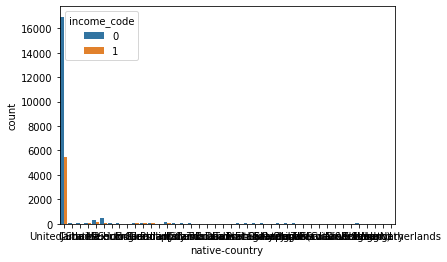

In [187]:
sns.countplot(x = "native-country", hue="income_code", data=mydata)

In [188]:
pd.crosstab(mydata["income_code"], dataset["native-country"])

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
income_code,,,,,,,,,,,,,,,,,,,,,
0,337,12,64,45,43,57,52,17,65,46,...,25,85,8,49,24,12,11,16941,48,7
1,108,4,35,15,2,15,2,2,7,26,...,3,11,1,15,18,3,1,5480,2,4


In [189]:
mydata.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex_code,income_code
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0


In [190]:
mydata['net-capital'] = mydata['capital-gain'] - mydata['capital-loss']

In [191]:
mydata = mydata.drop(['capital-gain', 'capital-loss'], axis=1)
mydata.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,hours-per-week,native-country,sex_code,income_code,net-capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,40,United-States,1,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,13,United-States,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,40,United-States,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,40,United-States,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,40,Cuba,0,0,0


In [192]:
num_cols = ["age", "demogweight","education-num","hours-per-week","net-capital"]

numeric = mydata[num_cols]

# create the standard scaler object
scaler = preprocessing.MinMaxScaler()

# fit the scaler to numerical variables
scaler.fit(numeric)

# array: standardized numerical variables
scaled_numeric = scaler.transform(numeric)

# dataset: standardized numerical variables
df_std_numeric = pd.DataFrame(scaled_numeric, columns=num_cols)
df_std_numeric.head()

,age,demogweight,education-num,hours-per-week,net-capital
0,0.301370,0.044302,0.800000,0.397959,0.062575
1,0.452055,0.048238,0.800000,0.122449,0.041742
2,0.287671,0.138113,0.533333,0.397959,0.041742
3,0.493151,0.151068,0.400000,0.397959,0.041742
4,0.150685,0.221488,0.800000,0.397959,0.041742


At the beginning we would like to manually encoding the variable "education" because the different levels of eduction have meaningful distance. However, after take a deep view into the variable "education-num" and "education", we found these two columns could have correlation.

Variables "education" and "education-num" may correlated, and variables "marital-status" and "relationship" could be correlated. Considering whether to omit one from each group.

It turns out that **education** and **education-num** have one-to-one relationship, while **relationship** and **marital-status** are not, so we decided to drop the **education** only.

Other categorical variables, namely "workclass", "marital-status", "occupation", "relationship", "race", it does not make sense to encoding them because label encoding can introduce ordinary, while in fact the distance b/w ""State-gov" and "private" to "Self-emp-not-inc" have no meaning.

In [193]:
mydata.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,hours-per-week,native-country,sex_code,income_code,net-capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,40,United-States,1,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,13,United-States,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,40,United-States,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,40,United-States,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,40,Cuba,0,0,0


In [194]:
mydata = mydata.drop(['native-country', 'education'], axis=1)
mydata.head()

,age,workclass,demogweight,education-num,marital-status,occupation,relationship,race,hours-per-week,sex_code,income_code,net-capital
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,40,1,0,2174
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,13,1,0,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,40,1,0,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,40,1,0,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,40,0,0,0


In [195]:
encodedata = pd.get_dummies(mydata)

In [196]:
encodedata = encodedata.drop(num_cols, axis=1)

In [197]:
encodedata.head()

,sex_code,income_code,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [198]:
encodedata = pd.concat([encodedata, df_std_numeric], axis=1)

In [199]:
encodedata.head()

,sex_code,income_code,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,age,demogweight,education-num,hours-per-week,net-capital
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0.301370,0.044302,0.800000,0.397959,0.062575
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.452055,0.048238,0.800000,0.122449,0.041742
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0.287671,0.138113,0.533333,0.397959,0.041742
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.493151,0.151068,0.400000,0.397959,0.041742
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.150685,0.221488,0.800000,0.397959,0.041742


In [200]:
# split predictors from target
Y = encodedata.iloc[:, [1]]
X = encodedata.drop(encodedata.columns[1], axis=1)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 123)

*Neural Network Model: 1 hidden layer with 128 nodes*

In [135]:
# create neural network model
model = Sequential()
num_hidden_node = 128
num_output_node = 1

In [136]:
# add 1 hidden layer
model.add(Dense(num_hidden_node, input_dim=len(X_train.columns), activation="relu"))
model.add(Dense(num_output_node, activation="sigmoid"))

In [137]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

*Train the Model:*

In [138]:
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=50, batch_size=250, verbose =1)

Train on 17500 samples, validate on 7500 samples
Epoch 1/50
17500/17500 [==============================] - 0s 16us/step - loss: 0.4629 - accuracy: 0.7834 - val_loss: 0.4007 - val_accuracy: 0.8153
Epoch 2/50
17500/17500 [==============================] - 0s 9us/step - loss: 0.3773 - accuracy: 0.8257 - val_loss: 0.3797 - val_accuracy: 0.8231
Epoch 3/50
17500/17500 [==============================] - 0s 9us/step - loss: 0.3633 - accuracy: 0.8291 - val_loss: 0.3712 - val_accuracy: 0.8269
Epoch 4/50
17500/17500 [==============================] - 0s 9us/step - loss: 0.3544 - accuracy: 0.8329 - val_loss: 0.3646 - val_accuracy: 0.8280
Epoch 5/50
17500/17500 [==============================] - 0s 8us/step - loss: 0.3474 - accuracy: 0.8348 - val_loss: 0.3607 - val_accuracy: 0.8344
Epoch 6/50
17500/17500 [==============================] - 0s 9us/step - loss: 0.3429 - accuracy: 0.8373 - val_loss: 0.3589 - val_accuracy: 0.8315
Epoch 7/50
17500/17500 [==============================] - 0s 9us/step - lo

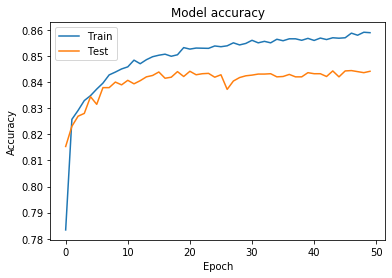

In [139]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [140]:
# predictions
y_pred = model.predict(X_test)
rounded = [round(x[0]) for x in y_pred]
#rounded

In [141]:
from sklearn.metrics import accuracy_score

a= accuracy_score(rounded, Y_test)
print('Accuracy Rate: ', a)

Accuracy Rate:  0.8441333333333333


**Citation:** <br />
*Author name: Justin Hallas <br />
Date: September 19, 2018 <br />
Title of program/source code: Wrapper for Sequential Models <br />
Code version: 1.0 <br />
Type: source code <br />
Web address or publisher: https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python/45371222/*

In [142]:
from keras.wrappers.scikit_learn import KerasClassifier
import eli5
from eli5.sklearn import PermutationImportance
def create_model():
    model = Sequential()        
    model.add(Dense(100, input_dim=len(X_train.columns), activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

X = X_train
y = Y_train

my_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=250, verbose=1)    
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm,feature_names = X.columns.tolist())

Epoch 1/50
17500/17500 [==============================] - 0s 10us/step - loss: 0.5714 - accuracy: 0.6926
Epoch 2/50
17500/17500 [==============================] - 0s 6us/step - loss: 0.4585 - accuracy: 0.7639
Epoch 3/50
17500/17500 [==============================] - 0s 6us/step - loss: 0.4185 - accuracy: 0.7945
Epoch 4/50
17500/17500 [==============================] - 0s 7us/step - loss: 0.3975 - accuracy: 0.8194
Epoch 5/50
17500/17500 [==============================] - 0s 6us/step - loss: 0.3860 - accuracy: 0.8206
Epoch 6/50
17500/17500 [==============================] - 0s 6us/step - loss: 0.3788 - accuracy: 0.8229
Epoch 7/50
17500/17500 [==============================] - 0s 6us/step - loss: 0.3737 - accuracy: 0.8249
Epoch 8/50
17500/17500 [==============================] - 0s 6us/step - loss: 0.3699 - accuracy: 0.8266
Epoch 9/50
17500/17500 [==============================] - 0s 6us/step - loss: 0.3668 - accuracy: 0.8283
Epoch 10/50
17500/17500 [==============================] - 0s 6

17500/17500 [==============================] - 0s 3us/step


Weight,Feature
0.0413 ± 0.0025,education-num
0.0160 ± 0.0024,net-capital
0.0139 ± 0.0014,marital-status_Never-married
0.0088 ± 0.0023,sex_code
0.0078 ± 0.0024,hours-per-week
0.0073 ± 0.0010,relationship_Wife
0.0066 ± 0.0006,workclass_Self-emp-not-inc
0.0062 ± 0.0012,occupation_Other-service
0.0062 ± 0.0029,age
0.0057 ± 0.0029,relationship_Own-child


<br />

*Another Neural Network Model: 2 hidden layers with 64 nodes in each*

In [143]:
# create neural network model
model2 = Sequential()

In [144]:
num_hidden_node = 64
num_output_node = 1

In [145]:
model2.add(Dense(num_hidden_node, input_dim=len(X_train.columns), activation='relu'))
model2.add(Dense(num_hidden_node, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [146]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [147]:
history2 = model2.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=50, batch_size=250, verbose=1)

Train on 17500 samples, validate on 7500 samples
Epoch 1/50
17500/17500 [==============================] - 0s 14us/step - loss: 0.4769 - accuracy: 0.7714 - val_loss: 0.3944 - val_accuracy: 0.8181
Epoch 2/50
17500/17500 [==============================] - 0s 8us/step - loss: 0.3696 - accuracy: 0.8281 - val_loss: 0.3730 - val_accuracy: 0.8268
Epoch 3/50
17500/17500 [==============================] - 0s 8us/step - loss: 0.3536 - accuracy: 0.8322 - val_loss: 0.3608 - val_accuracy: 0.8339
Epoch 4/50
17500/17500 [==============================] - 0s 8us/step - loss: 0.3430 - accuracy: 0.8398 - val_loss: 0.3575 - val_accuracy: 0.8348
Epoch 5/50
17500/17500 [==============================] - 0s 8us/step - loss: 0.3350 - accuracy: 0.8430 - val_loss: 0.3495 - val_accuracy: 0.8413
Epoch 6/50
17500/17500 [==============================] - 0s 9us/step - loss: 0.3314 - accuracy: 0.8425 - val_loss: 0.3496 - val_accuracy: 0.8351
Epoch 7/50
17500/17500 [==============================] - 0s 8us/step - lo

In [148]:
# predictions
y_pred = model2.predict(X_test)
rounded = [round(x[0]) for x in y_pred]
#rounded

In [149]:
from sklearn.metrics import accuracy_score

a= accuracy_score(rounded, Y_test)
print('Accuracy Rate: ', a)

Accuracy Rate:  0.8456


**Citation:** <br />
*Author name: Justin Hallas <br />
Date: September 19, 2018 <br />
Title of program/source code: Wrapper for Sequential Models <br />
Code version: 1.0 <br />
Type: source code <br />
Web address or publisher: https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python/45371222/*

In [150]:
from keras.wrappers.scikit_learn import KerasClassifier
import eli5
from eli5.sklearn import PermutationImportance
def create_model():
    model = Sequential()        
    model.add(Dense(64, input_dim=len(X_train.columns), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

X = X_train
y = Y_train

my_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=250, verbose=1)    
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm,feature_names = X.columns.tolist())

Epoch 1/50
17500/17500 [==============================] - 0s 12us/step - loss: 0.4928 - accuracy: 0.7543
Epoch 2/50
17500/17500 [==============================] - 0s 7us/step - loss: 0.3754 - accuracy: 0.8244
Epoch 3/50
17500/17500 [==============================] - 0s 7us/step - loss: 0.3569 - accuracy: 0.8297
Epoch 4/50
17500/17500 [==============================] - 0s 7us/step - loss: 0.3461 - accuracy: 0.8348
Epoch 5/50
17500/17500 [==============================] - 0s 7us/step - loss: 0.3368 - accuracy: 0.8416
Epoch 6/50
17500/17500 [==============================] - 0s 6us/step - loss: 0.3304 - accuracy: 0.8451
Epoch 7/50
17500/17500 [==============================] - 0s 7us/step - loss: 0.3261 - accuracy: 0.8477
Epoch 8/50
17500/17500 [==============================] - 0s 7us/step - loss: 0.3230 - accuracy: 0.8487
Epoch 9/50
17500/17500 [==============================] - 0s 7us/step - loss: 0.3208 - accuracy: 0.8499
Epoch 10/50
17500/17500 [==============================] - 0s 6

17500/17500 [==============================] - 0s 4us/step


Weight,Feature
0.0384 ± 0.0012,education-num
0.0278 ± 0.0025,marital-status_Never-married
0.0267 ± 0.0029,net-capital
0.0247 ± 0.0025,marital-status_Married-civ-spouse
0.0229 ± 0.0023,age
0.0220 ± 0.0007,occupation_Craft-repair
0.0185 ± 0.0015,occupation_Other-service
0.0154 ± 0.0002,marital-status_Divorced
0.0137 ± 0.0014,occupation_Adm-clerical
0.0127 ± 0.0010,occupation_Machine-op-inspct


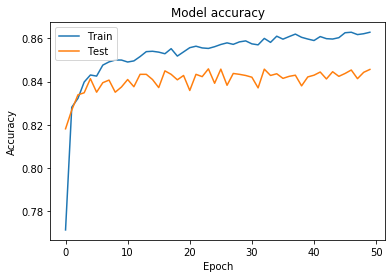

In [151]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

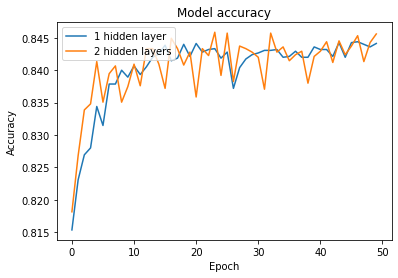

In [152]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['1 hidden layer', '2 hidden layers'], loc='upper left')
plt.show()

<br />

*Tune number of neurons in hidden layer:* 

**Citation:** <br />
*Author name: Jason Brownlee <br />
Date: August 9, 2016 <br />
Title of program/source code: How to Tune the Number of Neurons in the Hidden Layer <br />
Code version: 1.0 <br />
Type: source code <br />
Web address or publisher: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/*

In [153]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=len(X_train.columns), activation='relu' ))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=100, verbose=0)
# define the grid search parameters
neurons = [50, 64, 70, 90, 100, 128]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850629 using {'neurons': 90}
0.848457 (0.001972) with: {'neurons': 50}
0.849429 (0.002310) with: {'neurons': 64}
0.850286 (0.001900) with: {'neurons': 70}
0.850629 (0.002136) with: {'neurons': 90}
0.849429 (0.001617) with: {'neurons': 100}
0.848457 (0.000618) with: {'neurons': 128}


<br />

*Using the model to predict the income level on USCensusTest:*

In [165]:
testset = pd.read_csv("USCensusTest.csv")

In [166]:
testset.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,44,Private,162028,11th,7,Divorced,Sales,Unmarried,White,Female,0,0,44,United-States
1,20,Private,197997,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
2,46,Private,98350,10th,6,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,37,China
3,39,Private,165848,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
4,34,Private,178615,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


In [167]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
testset['sex_code'] = lb_make.fit_transform(testset['sex'])

In [168]:
testset = testset.drop(['sex'], axis=1)
testset.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex_code
0,44,Private,162028,11th,7,Divorced,Sales,Unmarried,White,0,0,44,United-States,0
1,20,Private,197997,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,40,United-States,1
2,46,Private,98350,10th,6,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,0,0,37,China,1
3,39,Private,165848,HS-grad,9,Married-civ-spouse,Sales,Husband,White,0,0,50,United-States,1
4,34,Private,178615,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1


In [169]:
testset = testset.drop(['education','native-country'], axis=1)

In [170]:
testset['net-capital'] = testset['capital-gain'] - testset['capital-loss']
testset = testset.drop(['capital-gain', 'capital-loss'], axis=1)

In [171]:
num_cols = ["age", "demogweight","education-num","hours-per-week","net-capital"]

numeric = testset[num_cols]

# create the standard scaler object
scaler = preprocessing.MinMaxScaler()

# fit the scaler to numerical variables
scaler.fit(numeric)

# array: standardized numerical variables
scaled_numeric = scaler.transform(numeric)

# dataset: standardized numerical variables
test_numeric = pd.DataFrame(scaled_numeric, columns=num_cols)
test_numeric.head()

,age,demogweight,education-num,hours-per-week,net-capital
0,0.369863,0.129191,0.400000,0.438776,0.041742
1,0.041096,0.160534,0.600000,0.397959,0.041742
2,0.397260,0.073703,0.333333,0.367347,0.041742
3,0.301370,0.132520,0.533333,0.500000,0.041742
4,0.232877,0.143645,0.533333,0.397959,0.041742


In [172]:
encodetest = pd.get_dummies(testset)

In [173]:
encodetest.head()

,age,demogweight,education-num,hours-per-week,sex_code,net-capital,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,44,162028,7,44,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,20,197997,10,40,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,46,98350,6,37,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,39,165848,9,50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,34,178615,9,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [174]:
encodetest = encodetest.drop(num_cols, axis=1)

In [175]:
encodetest.head()

,sex_code,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [176]:
encodetest = pd.concat([encodetest, test_numeric], axis=1)

In [177]:
encodetest.head()

,sex_code,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,age,demogweight,education-num,hours-per-week,net-capital
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.369863,0.129191,0.400000,0.438776,0.041742
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.041096,0.160534,0.600000,0.397959,0.041742
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0.397260,0.073703,0.333333,0.367347,0.041742
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.301370,0.132520,0.533333,0.500000,0.041742
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.232877,0.143645,0.533333,0.397959,0.041742


Dataset "encodetest" is ready to be put into the model for predication.

*Re-train the model with 2 hidden layers with 64 nodes in each:*

In [178]:
# create neural network model
model3 = Sequential()

In [179]:
num_hidden_node = 64
num_output_node = 1

In [180]:
model3.add(Dense(num_hidden_node, input_dim=len(encodetest.columns), activation='relu'))
model3.add(Dense(num_hidden_node, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [181]:
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [201]:
history3 = model3.fit(X, Y, epochs=50, batch_size=250, verbose=1)

Epoch 1/50
25000/25000 [==============================] - 0s 10us/step - loss: 0.4428 - accuracy: 0.7936
Epoch 2/50
25000/25000 [==============================] - 0s 7us/step - loss: 0.3638 - accuracy: 0.8296
Epoch 3/50
25000/25000 [==============================] - 0s 6us/step - loss: 0.3483 - accuracy: 0.8348
Epoch 4/50
25000/25000 [==============================] - 0s 7us/step - loss: 0.3376 - accuracy: 0.8412
Epoch 5/50
25000/25000 [==============================] - 0s 7us/step - loss: 0.3315 - accuracy: 0.8437
Epoch 6/50
25000/25000 [==============================] - 0s 7us/step - loss: 0.3267 - accuracy: 0.8460
Epoch 7/50
25000/25000 [==============================] - 0s 7us/step - loss: 0.3240 - accuracy: 0.8477
Epoch 8/50
25000/25000 [==============================] - 0s 7us/step - loss: 0.3216 - accuracy: 0.8483
Epoch 9/50
25000/25000 [==============================] - 0s 7us/step - loss: 0.3208 - accuracy: 0.8497
Epoch 10/50
25000/25000 [==============================] - 0s 8

*Use Model3 to predict the USCensusTest, and write the result into an ASCII file:*

In [202]:
# predictions
test_pred = model3.predict(encodetest)
rounded = [round(x[0]) for x in test_pred]

numpy.ndarray

In [203]:
type(rounded)

list

In [208]:
MyFile=open('Team7Predictions.txt','w')

for element in rounded:
     MyFile.write(str(element))
     MyFile.write('\n')
MyFile.close()